## LPC XL 2025 AI break-out

## Data Description
Dataframe "df" contains information about athletes (denoted by "user_id") over time (denoted by "date") during a 2 year period.
It contains a column "injury_onset" (Boolean) that indicates whether that athlete got injured on that day.
The column "to_be_injured" contains either 0s, 1s or NA (int64) and can be used for (logistic) regression.
The column "currently_injured" (Boolean) denotes whether the athlete is (still) injured on that day.
Each injury period is denoted by a unique identifier ("injury_idx", string).
There is also a helper column "days_until_next_injury" that denotes the number of days until the next injury.
And there is a helper column "next_injury_idx" that indicates what the injury_idx is of that upcoming injury.
There is a helper column "days_since_prev_injury_end" indicating the number of days since the previous injury.
There are also three Boolean columns that indicate an upcoming injury: upcoming_injury_within_28_days, upcoming_injury_within_14_days, upcoming_injury_within_07_days.

Each practice (max 1 per day) has an "rpe" (1-10) and a duration ("duration_minutes").
The distribution of the rpes is characterized by "training_distribution" (pyramidal or polarized).

Each practice day is also characterized by "session_rpe" (rpe * duration_minutes).
Each day is also characterized by:
     session_rpe_SUM_07_days: The sum of session_rpe in the past 7 days.
     session_rpe_STD0_07_days: The standard deviation of session_rpe in the past 7 days where days without practice have been assigned a 0.
     session_rpe_SUM_28_days: The sum of session_rpe in the past 28 days.
     session_rpe_STD0_28_days: The standard deviation of session_rpe in the past 28 days where days without practice have been assigned a 0.
     session_rpe_AC07_28_days: The acute (past 7 days) chronic (past 28 days) workload ratio. Values below 1 denote relative undertraining, above 1 overtraining.
     session_rpe_MON_28_days: the monotony of the past 28 days
     session_rpe_STR_28_days: the strain of the past 28 days

There are some metrics (1-10) that quantify the athlete's wellbeing: "Energy Score",	"Mood Score", "Recovery Score", "Motivation Score", "Confidence Score", "Sleep Quality Score".'
These metrics have been summarized for each day by taking the average ("Wellness Average").

Most importantly, it contains a set of columns with the suffix "_AVG_prev_07_days" that summarize the 7 days preceding the current day.
These columns should be used in combination for any predictions of to_be_injured.

- I'm a scientist and I want to examine whether "seilers blackhole" exists (increased risk with too many minutes with rpe 5 and 6). Create the code to examine this research question. Use the already prepared set of columns with suffix "_AVG_prev_07_days" as predictors for "to_be_injured".

In [29]:
import pandas as pd
import statsmodels.api as sm

# Identify predictor columns (only using those with the suffix "_AVG_prev_07_days")
predictor_cols = [col for col in df.columns if col.endswith("_AVG_prev_07_days")]

# Drop missing values for regression
df_model = df.dropna(subset=["to_be_injured"] + predictor_cols)

# Define dependent (target) and independent (predictor) variables
X = df_model[predictor_cols]
X = sm.add_constant(X)  # Add intercept
y = df_model["to_be_injured"]

# Fit logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())


         Current function value: 0.049902
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          to_be_injured   No. Observations:                 4660
Model:                          Logit   Df Residuals:                     4649
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.2548
Time:                        16:27:48   Log-Likelihood:                -232.54
converged:                      False   LL-Null:                       -312.04
Covariance Type:            nonrobust   LLR p-value:                 5.204e-29
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.5982      1.014     -0.590      0.

C:\Users\rmeer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:

# df_filtered['injury_onset'] = df_filtered['injury_onset'].astype(int)
df['injury_onset'] = df['injury_onset'].apply(pd.to_numeric, errors='coerce')
df_filtered['injury_onset'].dtypes
print(df_filtered['injury_onset'].value_counts())
print(df_filtered.shape)


injury_onset
0    4772
1      82
Name: count, dtype: int64
(4854, 35)


[[  1.          40.          40.           1.        ]
 [  1.          40.          40.           1.        ]
 [  1.          40.          40.           1.        ]
 ...
 [  1.          66.         195.           0.33846154]
 [  1.          66.         195.           0.33846154]
 [  1.          66.         195.           0.33846154]]
Optimization terminated successfully.
         Current function value: 0.085067
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4854
Model:                          Logit   Df Residuals:                     4850
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                0.007257
Time:                        15:29:02   Log-Likelihood:                -412.91
converged:                       True   LL-Null:                       -415.93
Covarianc

C:\Users\rmeer\AppData\Local\Temp\ipykernel_29508\2225974498.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df["injury_onset"] == 1), 'to_be_injured'] = True
C:\Users\rmeer\AppData\Local\Temp\ipykernel_29508\2225974498.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['to_be_injured'] = df_filtered['to_be_injured'].astype(int)
C:\Users\rmeer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated 

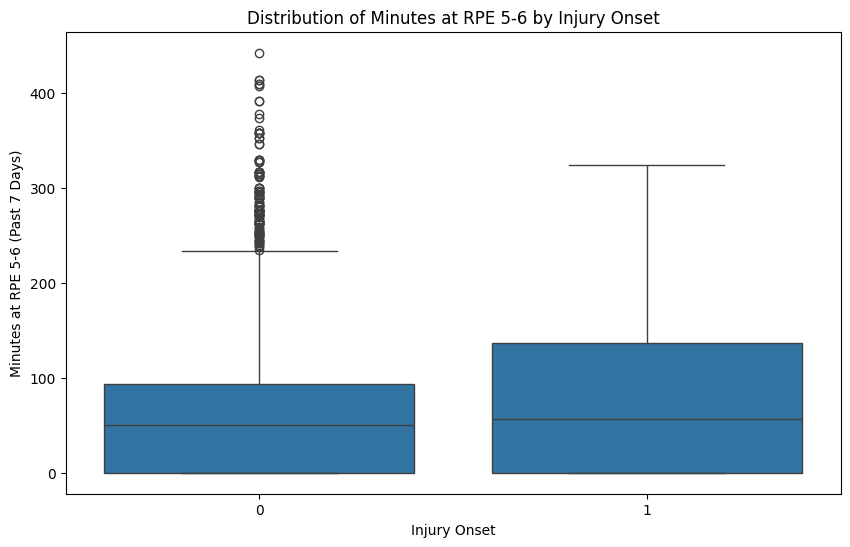

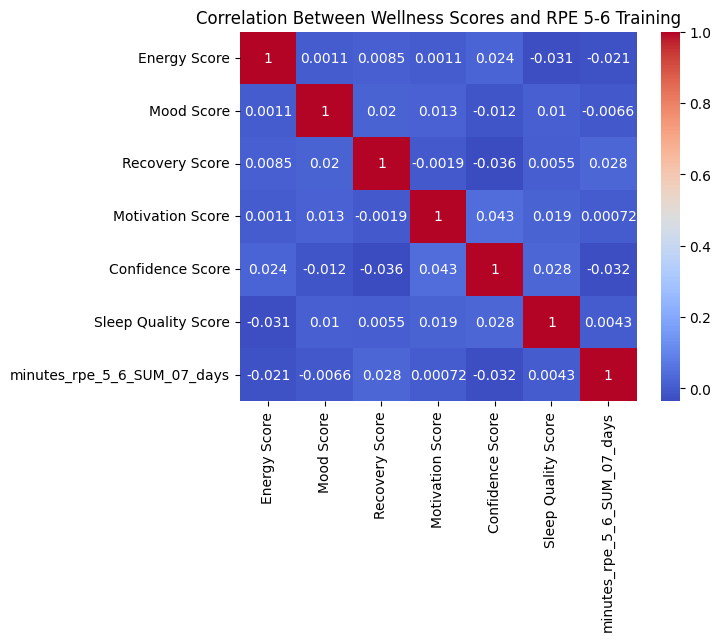

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('exported_data_biased.csv', index_col = 'Unnamed: 0')

# Create a new feature: Total minutes spent at RPE 5-6 per day
df['minutes_rpe_5_6'] = df.apply(lambda row: row['duration_minutes'] if row['rpe'] in [5, 6] else 0, axis=1)

# Create rolling sum features to quantify training in the "black hole"
df['minutes_rpe_5_6_SUM_07_days'] = df.groupby('user_id')['minutes_rpe_5_6'].rolling(7, min_periods=1).sum().reset_index(level=0, drop=True)
df['minutes_rpe_5_6_SUM_28_days'] = df.groupby('user_id')['minutes_rpe_5_6'].rolling(28, min_periods=1).sum().reset_index(level=0, drop=True)

df['minutes_rpe_5_6_AC07_28_days'] = df['minutes_rpe_5_6_SUM_07_days'] / df['minutes_rpe_5_6_SUM_28_days']

df['to_be_injured'] = np.nan
df.loc[(df["injury_onset"] == 1), 'to_be_injured'] = True
df.loc[(df["injury_onset"] == 0)&(df['currently_injured'] == False)&(df['upcoming_injury_within_28_days'] == False), 'to_be_injured'] = False
df_filtered = df[df['to_be_injured'].notnull()]
# df_filtered = df_filtered.dropna(subset=predictors + ['to_be_injured'])

df_filtered['to_be_injured'] = df_filtered['to_be_injured'].astype(int)

# Logistic Regression to predict injury onset based on "black hole" training
predictors = ['minutes_rpe_5_6_SUM_07_days', 'minutes_rpe_5_6_SUM_28_days', 'minutes_rpe_5_6_AC07_28_days']
df_filtered = df_filtered.dropna(subset=predictors + ['to_be_injured'])
X = df_filtered[predictors].to_numpy()
y = df_filtered['to_be_injured'].to_numpy()
X = sm.add_constant(X)

print(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['to_be_injured'], y=df_filtered['minutes_rpe_5_6_SUM_07_days'])
plt.xlabel('Injury Onset')
plt.ylabel('Minutes at RPE 5-6 (Past 7 Days)')
plt.title('Distribution of Minutes at RPE 5-6 by Injury Onset')
plt.show()

# Correlation with wellness scores
wellness_scores = ['Energy Score', 'Mood Score', 'Recovery Score', 'Motivation Score', 'Confidence Score', 'Sleep Quality Score']
correlation_matrix = df_filtered[wellness_scores + ['minutes_rpe_5_6_SUM_07_days']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Wellness Scores and RPE 5-6 Training')
plt.show()
